<a href="https://colab.research.google.com/github/ndtuan10/PatternRecognition_CS338.L22.KHCL/blob/main/BaiTap/Bai3_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bài tập 3**
# **Ngô Đức Tuấn**
MSSV: 18520186

- Cài đặt thuật toán KNN từ đầu không dùng thư viện

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import các thư viện cần dùng
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print('''
  Phiên bản của các thư viện :
    + numpy : {0}
    + matplotlib : {1}
    + pandas : {2}
'''.format(np.__version__, matplotlib.__version__, pd.__version__))


  Phiên bản của các thư viện :
    + numpy : 1.19.5
    + matplotlib : 3.2.2
    + pandas : 1.1.5



# **1. Giới thiệu về thuật toán KNN**

## Định nghĩa:
- **`Classification`** (phân lớp) thuộc kỹ thuật **`Supervised learning`** (Học có giám sát) là quá trình phân lớp 1 bài toán nếu các `nhãn` (`label`) của dữ liệu đầu vào được chia thành một số hữu hạn nhóm.

- Giới thiệu về phân lớp dữ liệu:
    - Cho tập các mẫu đã phân lớp trước, xây dựng mô hình cho từng lớp.
    - Mục đích: gán các mẫu mới vào các lớp với độ chính xác cao nhất có thể.
    - Dùng để phân lớp khách hàng, dự đoán tế bào, phân loại giao dịch,...
    - Quy trình phân lớp gồm 2 bước: xây dựng mô hình và sử dụng mô hình.

- **`K-nearest neighbor`** hay **`KNN`** là phương pháp phân lớp phổ biến nhất trong các **`phương pháp dựa trên thể hiện (instance-based classification)`**.
    - **`KNN`** khi huấn luyện, thuật toán này không học một điều gì từ dữ liệu training (do đó thuật toán này có thể gọi là `lazy learning`) mọi tính toán được thực hiện khi nó cần dự đoán kết quả của dữ liệu mới.
    - **`KNN`** có thể áp dụng cho `Classification` và `Regression`.
    - **`KNN`** còn gọi là `Instance-based learning` hay `Memory-based learning`.

## Ý tưởng:
- Không xây dựng một mô hình (mô tả) rõ ràng cho hàm mục tiêu cần học.
- Quá trình học chỉ lưu lại các dữ liệu huấn luyện.
- Việc dự đoán cho một quan sat mới sẽ dựa vào các hàng xóm gần nhất trong tập học.
=> Do đó KNN là một phương pháp phi tham số `(nonparametric methods)`. 

## Các bước thực hiện:
- **Bước 1**: xác định tham số `k` bằng *số láng giềng gần nhất* (nearest neighbors).
- **Bước 2**: tính *khoảng cách* đối tượng cần phân lớp với tất cả các đối tượng trong training data.
- **Bước 3**: sắp xếp *khoảng cách* theo thứ tự tăng dần và *xác định K láng giềng gần nhất* với đối tương cần phân lớp.
- **Bước 4**: lấy tất cả các lớp của *K láng giếng gần nhất*.
- **Bước 5**: dựa vào phần lớn lớp của K để xác định lớp cho đối tượng cần phân lớp.

## Ưu, nhược điểm:
- Ưu điểm:
    - Dễ cài đặt và sử dụng.
    - Độ phức tạp tính toán của quá trình trainning bằng 0.
    - Việc dự đoán kết quả của dữ liệu mới rất đơn giản.
    - Không cần giả sử gì về phân phối của các class.
    - **`KNN`** cũng có thể sử dụng cho bài toán `Regression`.
- Nhược điểm:
    - **`KNN`** phụ thuộc vào giá trị k do 
        - Nếu `k` quá nhỏ, nhạy cảm với nhiễu.
        - Nếu `k` quá lớn, vùng lân cận có thể chứa các đặc điểm của lớp khác.
    - Cần nhiều thời gian để xác định lớp cho 1 mẫu mới (cần tính và so sánh khoảng cách đến tất cả các mẫu).
    - `K` càng lớn thì độ phúc tạp cũng sẽ tăng.
    - Việc lưu toàn bộ dữ liệu trong bộ nhớ cũng ảnh hưởng tới hiệu năng.

# **2. Cài đặt KNN**

## **2.1 Load dữ liệu**

- Em sử dụng tập dữ liệu mống mắt từ sklearn.datasets. Bộ dữ liệu có các phép đo (Chiều dài Sepal, Chiều rộng Sepal, Chiều dài của cánh hoa, Chiều rộng của cánh hoa) cho 150 cây iris, được chia đều cho ba loài (0 = setosa, 1 = versicolor và 2 = virginica).

In [ ]:
# Load dữ liệu iris
from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


- Tách dữ liệu thành các thuộc tính có trong (X) và nhãn (label) mục tiêu (y), là nhãn loài cho từng loại cây.

In [ ]:
# Xóa cột target và tách thành 2 loại: X chứa các thuộc tính (5 thuộc tính) và y là nhãn (target)
X = df.drop('target', axis=1)
y = df.target

## **2.3 Hàm tính khoảng cách**
- Đóng vai trò rất quan trọng trong phương pháp học dựa trên các láng giềng gần nhất.
- Thường được xác định trước và không thay đổi trong suốt quá trình học và phân loai.
- **Các thuộc tính khác nhau** có thể (nên) có **mức độ ảnh hưởng khác nhau** đối với giá trị khoảng cách.
- Tính khoảng cách hai điểm đã cho bằng `Minkowski distance`

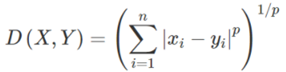

- `Minkowski distance` là thang đo khoảng cách tổng quát trong các thang đo. Tùy thuộc vào giá trị của p, ta sẽ có được một thang đo khác, ví dụ như:

    - p = 1, `Manhattan Distance`

    - p = 2, `Euclidean Distance`

    - p = ∞, `Chebychev Distance`

In [ ]:
# Tính toán khoảng cách giữa hai điểm
def minkowski_dist(a, b, p=1):

    dim = len(a)
    
    # Khởi tạo giá trị distance ban đầu
    dist = 0
    
    # Tính toán minkowski distance sử dụng tham số là p
    for d in range(dim):
        dist += abs(a[d] - b[d])**p    
    dist = dist**(1/p)
    return dist

minkowski_dist(a=X.iloc[0], b=X.iloc[1], p=1)

0.6999999999999993

In [ ]:
# Lặp lại phép tính minkowski_distance cho tất cả các điểm được gắn nhãn trong X và lưu trữ chúng trong khung dữ liệu.
test_pt = [4.8, 2.7, 2.5, 0.7]
# Ta lặp lại từng giá trị trong tập dữ liệu và sử dụng hàm khoảng cách ở trên để tính toán khoảng cách giữa hai điểm
# Tính khoảng cách giữa test_pt và tất cả các điểm trong X
dist = []
for i in X.index:
    dist.append(minkowski_dist(test_pt, X.iloc[i]))
df_dists = pd.DataFrame(data=dist, index=X.index, columns=['dist'])
df_dists.head()

,dist
0,2.7
1,2.0
2,2.3
3,2.1
4,2.7


## **2.4 Sắp xếp các số đo khoảng cách để tìm các điểm gần điểm kiểm tra nhất**

In [ ]:
# Tìm 5 hàng xóm gần nhất bằng phương thức sort_values
df_nearest_neighbor = df_dists.sort_values(by=['dist'], axis=0)[:5]
df_nearest_neighbor

,dist
98,1.4
57,1.5
93,1.7
24,1.8
30,1.8


## **2.5 Tìm nhãn xuất hiện nhiều nhất của những điểm gần nhất và dự đoán nhãn của điểm kiểm tra**
- Ta sử dụng 
    - `collection.Counter` để theo dõi các nhãn trùng với các điểm lân cận gần nhất.
    - phương thức `.most_common ()` để trả về nhãn xuất hiện phổ biến nhất.

In [ ]:
from collections import Counter

# Theo dõi nhãn trùng với các điểm lân cận gần nhất

counter = Counter(y[df_nearest_neighbor.index])

# Chọn nhãn chung nhất của tất cả các láng giềng gần nhất

counter.most_common()[0][0]

1

## **2.6 Tách dữ liệu train-test (Train-test split)**
- Thực hiện train_test_split trên dữ liệu (75% train, 25% test) sau đó chia tỷ lệ dữ liệu bằng StandardScaler(). Vì KNN dựa trên khoảng cách, điều quan trọng là phải đảm bảo rằng các tính năng được chia tỷ lệ phù hợp trước khi đưa chúng vào thuật toán.

### **Chuẩn hóa dữ liệu (Normalization data)**
- Các thuộc tính có giá trị lớn sẽ ảnh hưởng nhiều đến khoảng cách giữa các đối tượng.
- Các thuộc tính có miền giá trị khác nhau.
=> Cần phải chuẩn hóa dữ liệu.
- Chuẩn hóa dữ liệu / Co giãn dữ liệu (Normalization data / Scaling data) là một phương pháp chuẩn hóa phạm vi của các đặc trưng dữ liệu và được thực hiện trong suốt quá trình tiền xử lí dữ liệu. Có các cách để co giãn dữ liệu như chuẩn hóa min-max, co giãn trung bình,...Chúng tôi sử dụng *chính quy hóa (standardisation)*

- Việc chính quy hóa dữ liệu giúp cho giá trị của mỗi đặc trưng có trung bình bằng 0 và phương sai bằng 1. Phương pháp này được sử dụng rộng rãi trong việc chuẩn hóa dữ liệu của nhiều thuật toán học máy (SVM, logistic regression và ANNs).

Để tính toán chính quy hóa dữ liệu, ta phải xác định trung bình và độ lệch chuẩn cho phân phối của mỗi đặc trưng. Tiếp theo ta lấy mỗi giá trị của đặc trưng trừ đi giá trị trung bình rồi chia cho độ lệch chuẩn của đặc trưng đó như công thức dưới đây:

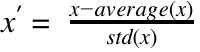

Trong đó *x* là véc-tơ đặc trưng ban đầu, *average(x)* là trung bình của véc-tơ đặc trưng đó và *std(x)* là độ lệch chuẩn của nó.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data - 75% train, 25% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=1)

# Scale the X data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **2.7 Dự đoán dữ liệu và tính độ chính xác trên tập train, test**
- Hàm `knn_predict` dự đoán nhận tất cả dữ liệu huấn luyện và kiểm tra, k và p, và trả về các dự đoán mà bộ phân loại KNN tạo cho tập kiểm tra (y_hat_test). Hàm sẽ trả về một danh sách các gợi ý nhãn chỉ chứa 0, 1 và 2.

In [ ]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        dist = []

        for train_point in X_train:
            dist_X = minkowski_dist(test_point, train_point, p=p)
            dist.append(dist_X)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=dist, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nearest_neighbor = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nearest_neighbor.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test


# Make predictions on test dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=5, p=1)

print(y_hat_test)

[0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0]


In [ ]:
# Tính độ chính xác (accuracy) trên tập test

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_hat_test)*100)

97.36842105263158


# **3. Kiểm tra thuật toán KNN bằng thư viện scikit-learn**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time
start = time.time()
clf = KNeighborsClassifier(n_neighbors=5, p=1)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
stop = time.time()
KNN_time = {stop - start}
print(f"Training time: {KNN_time}s")
print(f"Độ chính xác của KNN trong tập test (bằng thư viện scikit-learn): ", accuracy_score(y_test, y_pred_test)*100)

Training time: {0.004209280014038086}s
Độ chính xác của KNN trong tập test (bằng thư viện scikit-learn):  97.36842105263158
